<a href="https://colab.research.google.com/github/Amal-Alalami/Projects-CV/blob/main/Project1.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# to generate data
from keras.preprocessing.image import ImageDataGenerator

# to build model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
%matplotlib inline

# Upload Dataset

In [2]:
!7z x archive.zip



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 35779075 bytes (35 MiB)

Extracting archive: archive.zip
 64% 4096 Open              --
Path = archive.zip
Type = zip
Physical Size = 35779075

  0%      8% 566         14% 1018 - Alzheimer_s Dataset/test/VeryMildDemented/29 (28).jpg                                                                  23% 1564 - Alzheimer_s Dataset/train/MildDemented/mildDem355.jpg                                                                 

# **Explore Data Characteristics and Visualize Sample Images**

In [ ]:
images = []
classes = []
for subfolder in os.listdir('/content/Alzheimer_s Dataset'):
    subfolder_path = os.path.join('/content/Alzheimer_s Dataset', subfolder)
    for folder in os.listdir(subfolder_path):
        subfolder_path2=os.path.join(subfolder_path,folder)
        for image_filename in os.listdir(subfolder_path2):
            image_path = os.path.join(subfolder_path2, image_filename)
            images.append(image_path)
            classes.append(folder)
df = pd.DataFrame({'image': images, 'class': classes})
df

,image,class
0,/content/Alzheimer_s Dataset/test/ModerateDeme...,ModerateDemented
1,/content/Alzheimer_s Dataset/test/ModerateDeme...,ModerateDemented
2,/content/Alzheimer_s Dataset/test/ModerateDeme...,ModerateDemented
3,/content/Alzheimer_s Dataset/test/ModerateDeme...,ModerateDemented
4,/content/Alzheimer_s Dataset/test/ModerateDeme...,ModerateDemented
...,...,...
6395,/content/Alzheimer_s Dataset/train/NonDemented...,NonDemented
6396,/content/Alzheimer_s Dataset/train/NonDemented...,NonDemented
6397,/content/Alzheimer_s Dataset/train/NonDemented...,NonDemented
6398,/content/Alzheimer_s Dataset/train/NonDemented...,NonDemented


Images Info

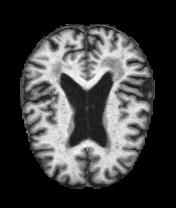

In [ ]:
img = cv2.imread(images[6390])
#img.shape
#print(img)
cv2_imshow(img)

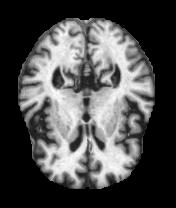

In [ ]:
img1 = cv2.imread(images[2003])
#img1.shape
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
cv2_imshow(img1)

# Images in train data

In [ ]:
train_folder = '/content/Alzheimer_s Dataset/train'
class_names_train_folder = os.listdir(train_folder)
class_count = []

for class_name in class_names_train_folder:
  num_images = len(os.listdir(os.path.join(train_folder, class_name)))
  class_count.append(num_images)
  print(f"Class {class_name}: {num_images} images")


Class VeryMildDemented: 1792 images
Class NonDemented: 2560 images
Class MildDemented: 717 images
Class ModerateDemented: 52 images


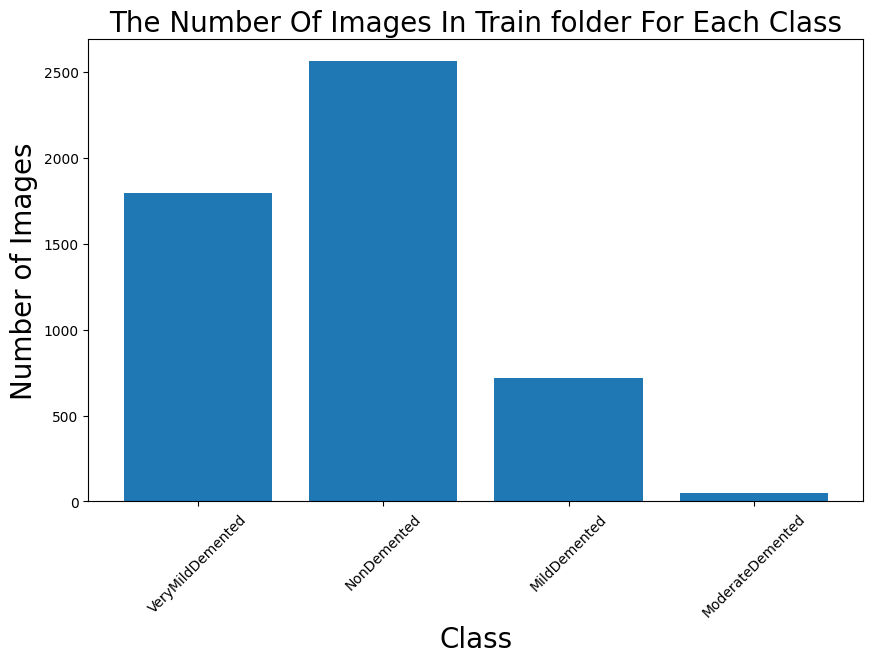

In [ ]:

plt.figure(figsize=(10, 6))
plt.bar(class_names_train_folder, class_count)

plt.title('The Number Of Images In Train folder For Each Class', fontsize=20)
plt.xlabel("Class", fontsize = 20)
plt.ylabel("Number of Images", fontsize=20)
plt.xticks(rotation=45)

plt.show()


Oversampling data

In [ ]:
# train_image_generator.class_indices


{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [3]:
rotation_angles = [-45, 45, 75]

data_augmentation = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=rotation_angles,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
train_folder = 'Alzheimer_s Dataset/train'
class_names = os.listdir(train_folder)
class_name_to_label = {class_name: i for i, class_name in enumerate(class_names)}
desired_count = 1700
image_width, image_height = 128, 128
augmented_data = []
augmented_labels = []

for class_name in class_names:
    class_folder = os.path.join(train_folder, class_name)
    for angle in rotation_angles:
        class_count = 0

        while class_count < desired_count:
            for image_file in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_file)

                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
                image = cv2.resize(image, (image_width, image_height))
                image = image / 255.0 #normalize
                image = image.reshape(1, image_width, image_height, 1)

                label = class_name_to_label[class_name]
                data_augmentation = ImageDataGenerator(rotation_range=angle)

                augmented_images = data_augmentation.flow(image)
                for _ in range(1):
                    augmented_data.append(augmented_images.next().reshape(image_width, image_height, 1))
                    augmented_labels.append(label)

                class_count += 1


print(type(augmented_data))

augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)
class_counts = np.bincount(augmented_labels)

for class_name, label in class_name_to_label.items():
    print(f"Class Name: {class_name}, Label: {label}, Count: {class_counts[label]} items")

<class 'list'>
Class Name: ModerateDemented, Label: 0, Count: 5148 items
Class Name: MildDemented, Label: 1, Count: 6453 items
Class Name: VeryMildDemented, Label: 2, Count: 5376 items
Class Name: NonDemented, Label: 3, Count: 7680 items


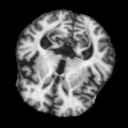

In [ ]:
augmented_image = augmented_data[1002] * 255
cv2_imshow(augmented_image.reshape(image_width, image_height))

In [ ]:
class_names

['ModerateDemented', 'MildDemented', 'VeryMildDemented', 'NonDemented']

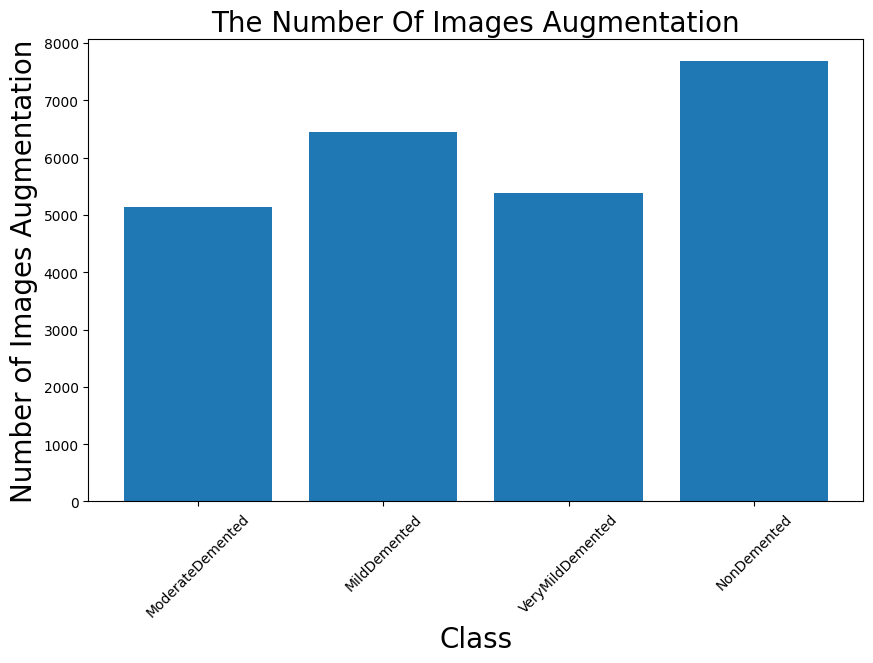

In [ ]:
class_count = np.bincount(augmented_labels)
class_label = class_names

plt.figure(figsize=(10, 6))
plt.bar(class_label, class_count)

plt.title('The Number Of Images Augmentation', fontsize=20)
plt.xlabel("Class", fontsize = 20)
plt.ylabel("Number of Images Augmentation", fontsize=20)
plt.xticks(rotation=45)

plt.show()

# **Train Test split and Build Model**

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(augmented_data, augmented_labels, test_size=0.3, random_state=42)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")

X_train shape: (17259, 128, 128, 1)
Y_train shape: (17259,)


In [ ]:
Y_train

array([0, 3, 0, ..., 0, 2, 3])

In [6]:
Y_train = tf.keras.utils.to_categorical(Y_train)

In [ ]:
Y_train

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [7]:
# CNN model
model1 = Sequential()
inputSize = (128,128,1)

#ilters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu')
model1.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=inputSize, activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=inputSize, activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=inputSize, activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(4, activation = 'softmax'))
model1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0

In [8]:
results = model1.fit(X_train, Y_train, epochs=30)

Epoch 1/30
540/540 [==============================] - 293s 541ms/step - loss: 1.0089 - accuracy: 0.5414
Epoch 2/30
540/540 [==============================] - 289s 535ms/step - loss: 0.7082 - accuracy: 0.6774
Epoch 3/30
540/540 [==============================] - 290s 537ms/step - loss: 0.5897 - accuracy: 0.7326
Epoch 4/30
540/540 [==============================] - 291s 539ms/step - loss: 0.4764 - accuracy: 0.7933
Epoch 5/30
540/540 [==============================] - 284s 526ms/step - loss: 0.3701 - accuracy: 0.8449
Epoch 6/30
540/540 [==============================] - 283s 525ms/step - loss: 0.2739 - accuracy: 0.8894
Epoch 7/30
540/540 [==============================] - 284s 525ms/step - loss: 0.1942 - accuracy: 0.9227
Epoch 8/30
540/540 [==============================] - 288s 534ms/step - loss: 0.1469 - accuracy: 0.9437
Epoch 9/30
540/540 [==============================] - 288s 534ms/step - loss: 0.0941 - accuracy: 0.9654
Epoch 10/30
540/540 [==============================] - 283s 525m

In [ ]:
print(model1.output_shape)

(None, 4)


# **Model Evaluation**

In [9]:
Y_test_cat = tf.keras.utils.to_categorical(Y_test)
print(X_test.shape)
print(Y_test_cat.shape)
model1.evaluate(X_test, Y_test_cat)

(7398, 128, 128, 1)
(7398, 4)
232/232 [==============================] - 49s 210ms/step - loss: 0.6264 - accuracy: 0.8702


[0.6264316439628601, 0.8702352046966553]

In [10]:
# Reshape Y_test to a 1-dimensional array
Y_test = Y_test.reshape(-1,)

predictions = model1.predict(X_test)
Y_predected = np.argmax(predictions, axis=1)
y_test_ = np.argmax(Y_test,axis=0)

df = pd.DataFrame({'Actual': Y_test, 'Prediction': Y_predected})
df

232/232 [==============================] - 32s 135ms/step


,Actual,Prediction
0,3,3
1,2,2
2,1,1
3,3,2
4,3,3
...,...,...
7393,3,3
7394,2,2
7395,0,0
7396,2,2


In [11]:
print(classification_report(Y_test, Y_predected))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1545
           1       0.89      0.90      0.90      1944
           2       0.77      0.72      0.75      1608
           3       0.84      0.86      0.85      2301

    accuracy                           0.87      7398
   macro avg       0.87      0.87      0.87      7398
weighted avg       0.87      0.87      0.87      7398

